# 📊 Technoprom Ltd.: Financial Crisis Analysis (EDA Project)

## Project Overview

This project presents an exploratory data analysis (EDA) of key financial indicators for the fictional company **Technoprom Ltd.** over a 5-year period.

**Objective** — to simulate a realistic business scenario, identify early signs of financial deterioration, and visualize trends that may indicate a developing crisis.

The project aims to:
- identify potential causes of the financial decline,
- analyze the dynamics of profit, debt burden, and expense structure,
- visualize key financial indicators to better understand crisis trends.

---

## Data Source

The dataset `techno_prom_financials.csv` was manually created to simulate a realistic set of company-level financial data.

---

## Data Preparation

To prepare the dataset for analysis, the following steps are planned:
- check the table structure and number of rows/columns,
- inspect data types,
- detect missing values,
- check for duplicates,
- verify uniqueness of values in the categorical `Indicator` column,
- convert numeric columns to `float` type to improve calculation accuracy,
- generate descriptive statistics using `.describe()` to understand ranges, averages, and potential anomalies.

After the preprocessing stage, the focus will shift to business analysis, data visualization, and interpreting results.

---

## Key Tasks

- Analyze trends in revenue, expenses, profit, and debt levels  
- Assess changes in profitability ratios  
- Identify the point of financial crisis onset  
- Create visualizations to represent key financial metrics


# ***Data Preprocessing Stage***

Before starting the analysis, it is important to ensure that the dataset is correct and suitable for use.  
Even though the dataset was manually created and is assumed to be error-free, it is still considered good practice to perform a basic technical check — including table structure, data types, missing values, and duplicates.  
This helps prevent potential distortions in both analysis and visualization.


***1. Importing Libraries***


This project uses three core Python libraries, each with its own advantages:

- **pandas** — ideal for working with tabular data: it simplifies loading, filtering, and analyzing datasets  
- **numpy** — provides fast and precise numerical computations, especially when working with arrays and formulas  
- **matplotlib** — enables the creation of clear and informative charts to better understand the data


In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


***2. Loading the Data***


We use a CSV file that contains the company’s financial indicators over a 5-year period.  
Using the `read_csv()` function from the **pandas** library, the data is loaded into a DataFrame — a convenient structure for further processing and analysis.  
Let’s make sure the file is successfully loaded and ready for initial inspection.


In [6]:
# Load the data from the CSV file into a DataFrame
df = pd.read_csv('C:/Palina/IT/Data Cloud Engineer COURSERA/My Projects/BankruptcyAnalysis/techno_prom_financials.csv')


***3. General Table Overview***


Let’s perform an initial overview of the dataset to examine its structure, data types, and ensure it was loaded correctly.  
This step helps identify potential issues early on, before proceeding with deeper analysis.


In [7]:
# Display the shape of the DataFrame (number of rows and columns)
print("Dataset shape:", df.shape)

# Show the first 5 rows to get a quick look at the structure and content
print("\nFirst 5 rows:")
print(df.head())

# Check the data types of each column
print("\nData types:")
print(df.dtypes)


Dataset shape: (15, 6)

First 5 rows:
                 Indicator  Year 1  Year 2  Year 3  Year 4  Year 5
0                  Revenue     520     470     410     360     320
1                     COGS     290     300     310     320     330
2             Gross_Profit     230     170     100      40     -10
3  Administrative_Expenses      60      70      85      95     100
4             Marketing_PR      20      30      45      50      55

Data types:
Indicator    object
Year 1        int64
Year 2        int64
Year 3        int64
Year 4        int64
Year 5        int64
dtype: object


***4. Checking for Missing Values***


We’ll check the dataset for missing values using the `isnull()` method, which detects cells with missing data (`NaN`), and `sum()` to count the number of such values in each column.  
This check helps prevent distortions in both analysis and visualization.


In [8]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Indicator    0
Year 1       0
Year 2       0
Year 3       0
Year 4       0
Year 5       0
dtype: int64


***5. Checking for Duplicates***


This step helps identify duplicate rows that could distort the analysis and visualizations.  
Ensuring there are no duplicates improves data integrity and reliability.


In [10]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


***6. Checking Uniqueness of Values in Categorical Columns***


This check ensures that categorical data does not contain unexpected or erroneous values.  
It is important for accurate grouping and reliable analysis.


In [12]:
# Display unique values in the 'Indicator' column
print(df['Indicator'].unique())


['Revenue' 'COGS' 'Gross_Profit' 'Administrative_Expenses' 'Marketing_PR'
 'EBITDA' 'Depreciation' 'Loan_Interest' 'Other_Expenses' 'Net_Profit'
 'Year_End_Debt' 'Cash_Flow' 'Inventory' 'Payables' 'Headcount']


***7. Converting Numeric Columns to Float***


We will convert all numeric columns to the `float` type, leaving categorical data unchanged.  
Converting columns from `int64` to `float` helps avoid precision loss during calculations.  
The `float` type allows for capturing even small differences between values, which is especially important for division, rounding, and other analytical operations.


In [14]:
# Identify all columns except 'Indicator' (since it contains text)
numeric_columns = df.columns.drop('Indicator')

# Convert numeric columns to float type
df[numeric_columns] = df[numeric_columns].astype(float)

# Display the first 5 rows after type conversion
df.head()


,Indicator,Year 1,Year 2,Year 3,Year 4,Year 5
0,Revenue,520.0,470.0,410.0,360.0,320.0
1,COGS,290.0,300.0,310.0,320.0,330.0
2,Gross_Profit,230.0,170.0,100.0,40.0,-10.0
3,Administrative_Expenses,60.0,70.0,85.0,95.0,100.0
4,Marketing_PR,20.0,30.0,45.0,50.0,55.0


***8. Descriptive Statistics***


We’ll calculate descriptive statistics using the `describe()` method.  
This provides a quick summary of the numeric columns — including range, averages, and potential anomalies in the data.


In [15]:
# Print section title
print("\nDescriptive Statistics:")

# Use the describe() method to generate a statistical summary of numeric columns
print(df.describe())



Descriptive Statistics:
           Year 1      Year 2      Year 3      Year 4      Year 5
count   15.000000   15.000000   15.000000   15.000000   15.000000
mean   118.666667  103.666667   88.333333   77.000000   73.000000
std    137.587202  129.827725  142.874404  176.734264  213.380947
min     10.000000  -10.000000 -115.000000 -215.000000 -290.000000
25%     27.500000   25.000000   25.000000   35.000000   12.500000
50%     80.000000   60.000000   65.000000   50.000000   55.000000
75%    135.000000  140.000000  120.000000  115.000000  125.000000
max    520.000000  470.000000  410.000000  380.000000  520.000000


## Conclusions from the Data Preprocessing Stage

All key steps were successfully completed to ensure a solid foundation for further analysis:

1. **Data successfully loaded** — the table contains 15 rows and 6 columns, and its structure is valid.  
2. **Data types verified** — numeric values were initially in `int64` format and then converted to `float` to improve calculation precision.  
3. **No missing values** — no `NaN` values were found in any column, indicating data completeness.  
4. **No duplicates** — the dataset contains no duplicate rows, ensuring the accuracy of the analysis.  
5. **Categorical values (`Indicator`)** — verified for uniqueness; all values are meaningful and free from errors.  
6. **Descriptive statistics** — revealed a wide range of values, including both high positives and negatives, especially in key indicators such as profit.  
   This suggests financial instability, and such sharp fluctuations require further business analysis to identify their causes and assess their impact on the company’s overall stability.


# ***Transition to Indicator Analysis***

After completing all key preprocessing steps, the dataset was validated for completeness, correct data types, absence of duplicates, and logical structure.  
This has laid a solid foundation for the upcoming business analysis, allowing us to better understand the dynamics and root causes of changes in financial indicators.

Now we move on to the economic part of the project:  
we will examine how the company’s key metrics evolved over the past five years and what conclusions can be drawn from these changes.


## Part 1. 5-Year Analysis of Company Indicators  
**Note:** All financial figures in this project are presented in thousands of US dollars ($K).

This section begins the analysis of key financial indicators for the company **Technoprom Ltd.** over a 5-year period.  
The goal is to identify patterns, potential causes of financial difficulties, and evaluate business stability based on changes in core metrics.

To move from raw numbers to meaningful insights, we will add a column showing the **percentage change** for each indicator between Year 1 and Year 5.  
This will help visualize growth or decline across the analyzed period.


In [17]:
# Add a column with 5-year percentage change, rounded to 1 decimal place
df['Change_5Y (%)'] = np.round(((df['Year 5'] - df['Year 1']) / df['Year 1']) * 100, 1)

# Display a table with selected columns: indicator name, values for Year 1 and Year 5, and the calculated change
df[['Indicator', 'Year 1', 'Year 5', 'Change_5Y (%)']]


,Indicator,Year 1,Year 5,Change_5Y (%)
0,Revenue,520.0,320.0,-38.5
1,COGS,290.0,330.0,13.8
2,Gross_Profit,230.0,-10.0,-104.3
3,Administrative_Expenses,60.0,100.0,66.7
4,Marketing_PR,20.0,55.0,175.0
5,EBITDA,150.0,-165.0,-210.0
6,Depreciation,25.0,40.0,60.0
7,Loan_Interest,15.0,50.0,233.3
8,Other_Expenses,10.0,35.0,250.0
9,Net_Profit,100.0,-290.0,-390.0


To better visualize the dynamics of change, we will create a bar chart titled ***"Technoprom Ltd. — 5-Year Dynamics of Key Indicators"***, clearly showing the percentage increase or decrease of each core metric over the five-year period.
This type of chart makes it easy to identify which aspects of the business experienced growth and which ones entered a risk zone.

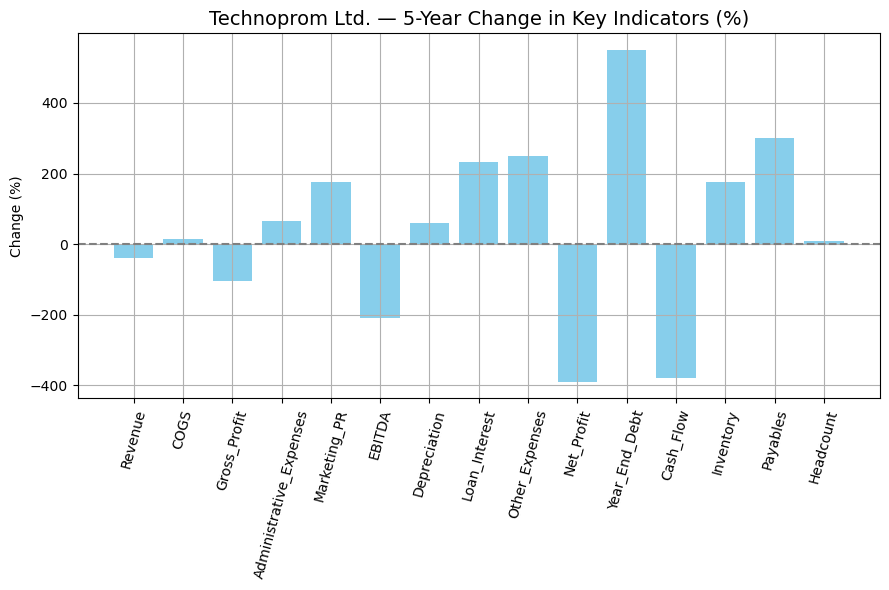

In [18]:
# Set the size of the figure (width x height)
plt.figure(figsize=(9, 6))  

# Create a bar chart
plt.bar(df['Indicator'], df['Change_5Y (%)'], color='skyblue')  

# Add a horizontal line at 0% to separate growth and decline
plt.axhline(0, color='gray', linestyle='--') 

# Add chart title with increased font size
plt.title('Technoprom Ltd. — 5-Year Change in Key Indicators (%)', fontsize=14)

# Label for the Y-axis
plt.ylabel('Change (%)') 

# Rotate X-axis labels for better readability
plt.xticks(rotation=75)  

# Add grid for easier visual analysis
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()  

# Display the chart
plt.show()



## 📌 Conclusions: Company Performance Analysis

Over the five-year period, **Technoprom Ltd.** has shown **significant deterioration** across most key financial indicators — a clear sign of an escalating financial crisis.

### **Revenue and Profitability**

- **Revenue** decreased by 38.5% — indicating a shrinking business scale or market loss.  
- **Gross Profit** declined by 104.3%, turning negative and signaling direct losses.  
- **Net Profit** dropped by 390%, reflecting deep unprofitability.  
- **EBITDA** fell by 210%, highlighting a sharp drop in operating efficiency.  
- **Operating Cash Flow** declined by 377.8%, raising concerns about liquidity and solvency.

### **Costs and Expenses**

- **Cost of Goods Sold (COGS)** increased by 13.8% despite falling revenue — reducing gross margins.  
- **Administrative Expenses** rose by 66.7%, and **Marketing & PR** expenses by 175% — likely indicating inefficient growth investments.  
- **Loan Interest** surged by 233.3%, and **Other Expenses** by 250%, pointing to rising debt pressure and additional financial burdens.  
- **Depreciation** increased by 60%, potentially due to asset revaluation, adoption of accelerated depreciation methods, or shortened useful life under declining business conditions.

### **Balance Sheet and Assets**

- **Year-End Debt** grew by 550%, posing a serious threat to financial stability.  
- **Inventory** rose by 175%, and **Payables** by 300%, which may suggest turnover and liquidity issues.  
- **Headcount** remained nearly unchanged (+8.3%) despite financial downturn — possibly indicating inefficient resource allocation.

---

In summary, this part of the analysis clearly shows that **Technoprom Ltd.** has shifted from a profitable model to a deeply unprofitable one within five years. Declining revenue, rising costs, falling profits, and ballooning debt all point to a collapsing business model.


## Part 2. Expense Structure Analysis

In this section, we analyze the **expense structure of the company in Year 5** — the period when the business had already entered a crisis phase. This helps us focus on how funds were allocated during the most financially unstable period and identify key cost drivers.

We will highlight the main expense categories and calculate their share in the total cost. This analysis helps to:
- understand where the majority of funds are going;
- identify potential inefficiencies;
- determine priority areas for budget optimization and cost restructuring.

The results will be visualized to clearly represent the company’s current financial structure.


In [20]:
# Selecting key expense categories for analysis
expense_rows = [
    'COGS',                    # Cost of Goods Sold    
    'Administrative_Expenses', # Administrative Expenses
    'Marketing_PR',            # Marketing & PR
    'Depreciation',            # Depreciation
    'Loan_Interest',           # Loan Interest
    'Other_Expenses'           # Other Expenses
]

# Filter the dataset for selected expense rows and keep values for Year 1 and Year 5
expense_data = df[df['Indicator'].isin(expense_rows)][['Indicator', 'Year 1', 'Year 5']].copy()

# Extract Year 5 expense values as a NumPy array
values = expense_data['Year 5'].values

# Calculate total expenses in Year 5
total = np.sum(values)

# Calculate the share of each expense category as a percentage of the total (rounded to 1 decimal)
proportions = np.round((values / total) * 100, 1)

# Add a new column with the calculated shares
expense_data['Share (%)'] = proportions

# Reset the index for a cleaner table display
expense_data.reset_index(drop=True, inplace=True)

# Display the final table with expense distribution
expense_data


,Indicator,Year 1,Year 5,Share (%)
0,COGS,290.0,330.0,54.1
1,Administrative_Expenses,60.0,100.0,16.4
2,Marketing_PR,20.0,55.0,9.0
3,Depreciation,25.0,40.0,6.6
4,Loan_Interest,15.0,50.0,8.2
5,Other_Expenses,10.0,35.0,5.7


We will create a pie chart titled **"Technoprom Ltd. Expense Structure in Year 5"**  to clearly show the proportion of each major expense category in the final year.  
This visualization helps quickly identify where most funds are being spent and highlight the main cost drivers.


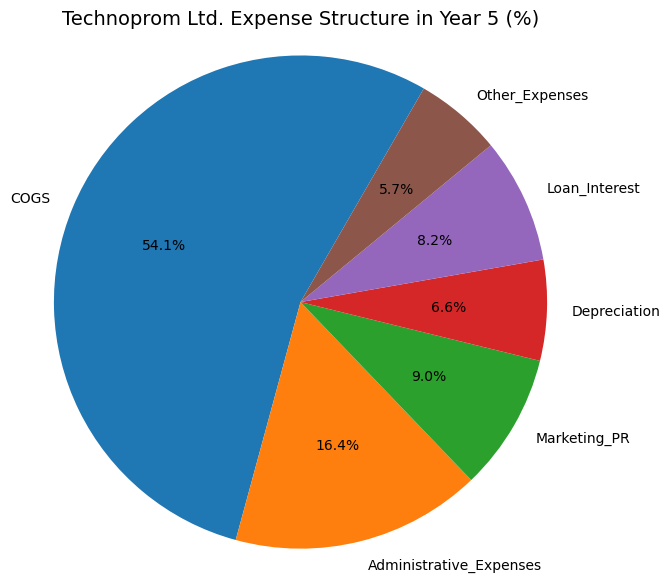

In [21]:
# Create the figure
plt.figure(figsize=(7, 7))

# Plot the pie chart
plt.pie(expense_data['Share (%)'], labels=expense_data['Indicator'], autopct='%1.1f%%', startangle=60)

# Add chart title with increased font size
plt.title('Technoprom Ltd. Expense Structure in Year 5 (%)', fontsize=14)

# Ensure the pie chart is perfectly circular
plt.axis('equal')

# Show the chart
plt.show()



## 📊 Conclusions on Expense Trends and Structure (in USD thousands)

Over the past five years, TechnoProm Ltd. has seen a significant increase in spending* across all major categories. This indicates poor cost control and potentially ineffective resource management strategies.

***Cost of Goods Sold (COGS)*** increased from 290 to $330K, accounting for 54.1% of total expenses. As the company’s largest expense, this rise—despite falling revenue—reduces profitability and may signal issues in production efficiency or procurement strategy.

***Administrative Expenses*** grew from 60 to $100K, representing 16.4% of total costs. The increase in administrative expenses without a noticeable improvement in profitability may indicate overstaffing or inefficient administrative processes.

***Marketing and PR Expenses*** nearly tripled—from 20 to $55K—now making up 9% of the budget. This suggests poor returns on marketing investment and possible misallocation of promotional funds.

***Loan Interest*** and ***Depreciation*** accounted for 8.2% and 6.6% of total expenses respectively. These figures reflect rising debt burden and higher asset servicing costs.

***Other Expenses*** surged 3.5 times, from 10 to $35K, now comprising 5.7% of total spending. This area warrants further investigation and breakdown.

***In summary***, TechnoProm Ltd.’s expense structure during the crisis period is marked by across-the-board cost growth, particularly in administrative and marketing categories. 
This rising expenditure was not accompanied by an increase in revenue or profitability, indicating weak financial governance and an overloaded business model.  These trends highlight the urgent need for a deeper analysis of operational efficiency and a strategic reassessment of budget allocation.



To better understand the growing pressure on expenses and the decline in efficiency, we will now examine the dynamics of revenue and operating costs over time.  
This will help assess how key income and cost indicators evolved, and how these changes impacted the company’s financial health.

## Part 3. Analysis of Revenue and Operating Expenses

To assess changes in the company’s financial condition over the 5-year period, we will analyze the dynamics of ***revenue*** and ***core expenses — cost of goods sold (COGS), administrative, and marketing costs***.

This analysis is based not on formal accounting classifications, but on actual operational spending, which provides a more accurate understanding of where the company’s funds are truly allocated during its core business activities.

The comparison will help to:
- trace the relationship between income and expenses over time,  
- identify the point at which expenses began to exceed revenue,  
- detect imbalances in the expense structure.


In [22]:
# Define an array with the names of the years
years = np.array(['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])                  # array(['Year 1', ..., 'Year 5'], dtype='<U6')

# Extract revenue values by year
revenue = df[df['Indicator'] == 'Revenue'].iloc[0, 1:6].values                        # array([520, 470, 410, 360, 320], dtype=object)

# Extract values for expense categories: COGS, administrative, and marketing
cogs = df[df['Indicator'] == 'COGS'].iloc[0, 1:6].values                              # array([290, 300, 310, 320, 330], dtype=object)
admin = df[df['Indicator'] == 'Administrative_Expenses'].iloc[0, 1:6].values          # array([60, 70, 85, 95, 100], dtype=object)
marketing = df[df['Indicator'] == 'Marketing_PR'].iloc[0, 1:6].values                 # array([20, 30, 45, 50, 55], dtype=object)

# Sum the three categories to get total operating expenses
total_expenses = cogs + admin + marketing                                             # array([370, 400, 440, 465, 485], dtype=object)

# Create the final summary table with results by year
data = {
    'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'],
    'Revenue': revenue,
    'Total_Operating_Expenses': total_expenses
}
df_summary = pd.DataFrame(data)
df_summary


,Year,Revenue,Total_Operating_Expenses
0,Year 1,520.0,370.0
1,Year 2,470.0,400.0
2,Year 3,410.0,440.0
3,Year 4,360.0,465.0
4,Year 5,320.0,485.0


We will visualize the analysis results in the chart "Technoprom Ltd.: Revenue vs. Expenses" to highlight the increasing pressure on the business model.

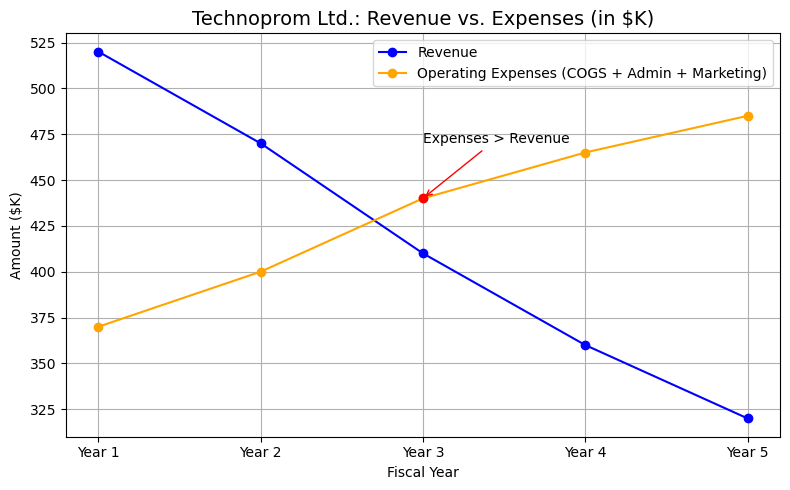

In [24]:
# Plotting the graph
plt.figure(figsize=(8, 5))  # Create a figure with specified width and height

# Revenue line
plt.plot(years, revenue, marker='o', label='Revenue', color='blue')

# Operating expenses line (COGS + Admin + Marketing)
plt.plot(years, total_expenses, marker='o', label='Operating Expenses (COGS + Admin + Marketing)', color='orange')

# Add a red marker at the year when expenses exceeded revenue (Year 3)
plt.plot('Year 3', total_expenses[2], 'ro')

# Add an annotation (label with an arrow) to this point
plt.annotate(
    'Expenses > Revenue',                          # Annotation text
    xy=('Year 3', total_expenses[2]),              # Arrow points to this coordinate
    xytext=('Year 3', total_expenses[2] + 30),     # Text position (30 units above)
    arrowprops=dict(arrowstyle='->', color='red')  # Arrow style and color
)

# Title of the chart
plt.title('Technoprom Ltd.: Revenue vs. Expenses (in $K)', fontsize=14)

# Axis labels
plt.xlabel('Fiscal Year')
plt.ylabel('Amount ($K)')

# Display the legend (line descriptions)
plt.legend()

# Add gridlines for better readability
plt.grid(True)

# Optimize layout and spacing of chart elements
plt.tight_layout()

# Display the final chart
plt.show()


## 📉 Conclusions on Revenue and Operating Expense Analysis

Technoprom Ltd.’s ***revenue*** declined from 520 in Year 1 to $320K in Year 5 — a 38% decrease over the five-year period. 

**Total operating expenses** (including COGS, administrative, and marketing costs) rose from 370 to $485K, reflecting a 31% increase.

This widening gap between shrinking revenue and rising costs indicates that the company is failing to adjust its expenses in response to declining income. This mismatch undermines operational efficiency and increases financial strain.

By **Year 3**, expenses had already surpassed revenue — a trend clearly visible on the chart. This marks a **critical deterioration in financial health** and highlights growing risks to the company’s business sustainability.


Now, to better understand the reasons behind the company’s financial deterioration, we will examine the dynamics of two key financial indicators — net profit and debt load over the same period.
Analyzing the trends in these metrics will help identify potential insolvency risks and assess the overall financial stability of the business.

## Part 4. Dynamics of Net Profit and Debt Load
In this section, we examine the changes in ***net profit*** and ***year-end debt*** over the past 5 years.

Analyzing these key indicators helps assess the financial condition of the company, identify trends in profitability and debt burden. This is essential for understanding how the increase in debt affects the company’s ability to generate profit and maintain solvency.

If net profit declines while debt continues to grow, it signals financial instability and an increased risk of insolvency or bankruptcy.




In [26]:
# Extract Net Profit values for each year
net_profit = df[df['Indicator'] == 'Net_Profit'].iloc[0, 1:6].values          # array([100.0, 5.0, -115.0, -215.0, -290.0])

# Extract Year-End Debt values
debt = df[df['Indicator'] == 'Year_End_Debt'].iloc[0, 1:6].values             # array([80.0, 150.0, 250.0, 380.0, 520.0])

# Create a summary table with results by year
data1 = {
    'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'],
    'Net_Profit': net_profit,
    'Year_End_Debt': debt
}
df_summary1 = pd.DataFrame(data1)
df_summary1



,Year,Net_Profit,Year_End_Debt
0,Year 1,100.0,80.0
1,Year 2,5.0,150.0
2,Year 3,-115.0,250.0
3,Year 4,-215.0,380.0
4,Year 5,-290.0,520.0


To provide a clearer view, we will plot the chart "Technoprom Ltd.: Dynamics of Net Profit and Debt Load".


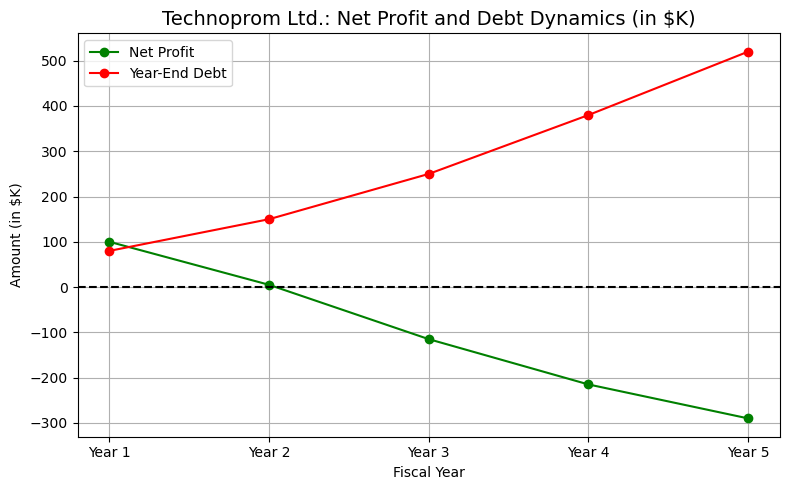

In [27]:
# Define the list of years for the X-axis
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']

# Create a figure with specified size
plt.figure(figsize=(8, 5))

# Plot Net Profit: points with 'o' marker, green color, label in the legend
plt.plot(years, net_profit, marker='o', label='Net Profit', color='green')

# Plot Year-End Debt: points with 'o' marker, red color, label in the legend
plt.plot(years, debt, marker='o', label='Year-End Debt', color='red')

# Add chart title with increased font size
plt.title('Technoprom Ltd.: Net Profit and Debt Dynamics (in $K)', fontsize=14)

# X-axis label
plt.xlabel('Fiscal Year')

# Y-axis label
plt.ylabel('Amount (in $K)')

# Add horizontal dashed line at 0 to show when values cross into negative
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Display the legend for the plots
plt.legend()

# Enable grid for better readability
plt.grid(True)

# Automatically adjust layout for clean display
plt.tight_layout()

# Show the plot
plt.show()


## Conclusions on the Dynamics of Net Profit and Debt Load
Over the 5-year period, the company's ***net profit*** declined from 100 in Year 1 to a loss of $-290K in Year 5. 

Meanwhile, ***year-end debt*** rose from 80 to $520K — an increase of more than sixfold.

The situation became particularly critical starting from Year 3, when net profit turned negative for the first time, while debt continued to grow rapidly.

This combination of rising debt and declining profitability indicates a serious deterioration in the company's financial condition, increases the risk of insolvency, and threatens the sustainability of its business model.

Next, we will proceed to calculate key financial ratios to further evaluate the company's profitability, efficiency, and financial stability.

## Part 5. Calculation of Key Financial Ratios
We now turn to assessing the company's operational efficiency and profitability using key financial ratios.
Despite the current losses, analyzing these indicators allows for a deeper understanding of how effectively resources are being utilized and which areas of the business require special attention.

The following ratios will be calculated in this section:
- ***Gross Profit Margin*** — the share of gross profit in revenue, reflecting the basic profitability of products or services;
- ***Operating Margin*** — shows how much profit remains after operating expenses (excluding interest and taxes);
- ***Net Profit Margin*** — reflects the overall effectiveness of the company's operations.

These indicators will help identify weaknesses in the financial model and determine priority areas for strategic adjustment, in order to stabilize the business and set it on a path to recovery.

In [28]:
# Create a dictionary-like DataFrame for easy access to rows by indicator (index by 'Indicator' column)
ind = df.set_index('Indicator')

# Extract 5-year values for key indicators

# Revenue over 5 years
revenue = ind.loc['Revenue'].iloc[:5].values                         # array([520.0, 470.0, 410.0, 360.0, 320.0])

# Gross Profit over 5 years
gross_profit = ind.loc['Gross_Profit'].iloc[:5].values               # array([230.0, 170.0, 100.0, 40.0, -10.0])

# Operating Profit = Gross Profit - Administrative Expenses - Marketing & PR
op_profit = (                                                        #array([150.0, 70.0, -30.0, -105.0, -165.0])   
    gross_profit                                                     #array([230.0, 170.0, 100.0,  40.0, -10.0])
    - ind.loc['Administrative_Expenses'].iloc[:5].values             #array([ 60.0,  70.0,  85.0,  95.0, 100.0])
    - ind.loc['Marketing_PR'].iloc[:5].values                        #array([20.0, 30.0, 45.0, 50.0, 55.0])
)

# Net Profit over 5 years 
net_profit = ind.loc['Net_Profit'].iloc[:5].values                   # array([100.0, 5.0, -115.0, -215.0, -290.0])


# Calculate profitability ratios in percentages (rounded to 1 decimal)

# Gross Profit Margin = Gross Profit / Revenue
gpm = np.round((gross_profit / revenue) * 100, 1)                   # array([44.2, 36.2, 24.4, 11.1, -3.1])

# Operating Margin = Operating Profit / Revenue
opm = np.round((op_profit / revenue) * 100, 1)                      # array([28.8, 14.9, -7.3, -29.2, -51.6])

# Net Profit Margin = Net Profit / Revenue
npm = np.round((net_profit / revenue) * 100, 1)                     # array([19.2, 1.1, -28.0, -59.7, -90.6])

# Create a summary table with results by year
pd.DataFrame({
    'Year': [1, 2, 3, 4, 5],
    'Gross Profit Margin (%)': gpm,
    'Operating Margin (%)': opm,
    'Net Profit Margin (%)': npm
})


,Year,Gross Profit Margin (%),Operating Margin (%),Net Profit Margin (%)
0,1,44.2,28.8,19.2
1,2,36.2,14.9,1.1
2,3,24.4,-7.3,-28.0
3,4,11.1,-29.2,-59.7
4,5,-3.1,-51.6,-90.6


## 📊 What Do Financial Margins Indicate and What Are Acceptable Benchmarks?
Financial ratios help assess ***the profitability and efficiency*** of a business. Below are three key indicators calculated for the reporting period:

| **Metric**              | **What It Indicates**                                     | **Formula**                                   | **Benchmark Value**        |
|-------------------------|-----------------------------------------------------------|-----------------------------------------------|-----------------------------|
| **Gross Profit Margin** | Gross profitability — how much remains after COGS         | Gross Profit / Revenue                        | **> 30%** — strong margin   |
| **Operating Margin**    | Operating profitability — profit after operating expenses | (Gross Profit – Operating Expenses) / Revenue | **> 10%** — stable          |
| **Net Profit Margin**   | Net profitability — overall business profitability        | Net Profit / Revenue                          | **> 5–10%** — acceptable    |

💡 ***If these indicators are negative***, it means the company is experiencing losses, inefficiency, and potential risk of bankruptcy.

## In our case:
- Gross profit margin is negative → cost of goods sold exceeds revenue.
- Operating and net profit margins are also below zero.
- This means the company is unable to cover its costs and is therefore in deep financial crisis.

To enhance clarity, we will present a chart showing the evolution of gross, operating, and net profit margins over a 5-year period: "Technoprom Ltd.: Financial Ratio Trends by Year." This will help visualize how the company’s efficiency changed over time and identify the point at which performance began to sharply deteriorate.

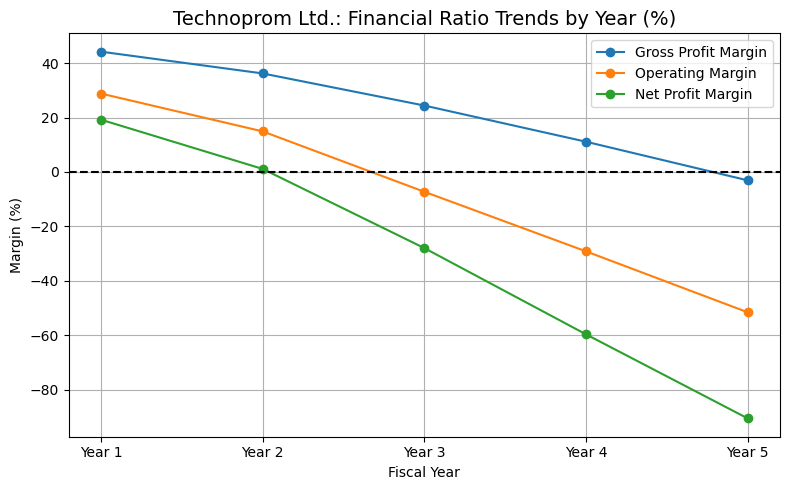

In [29]:
# Define the list of years for the X-axis
years = ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']

# Create the figure and set the plot size
plt.figure(figsize=(8, 5))

# Plot the Gross Profit Margin line
plt.plot(years, gpm, marker='o', label='Gross Profit Margin')

# Plot the Operating Margin line
plt.plot(years, opm, marker='o', label='Operating Margin')

# Plot the Net Profit Margin line
plt.plot(years, npm, marker='o', label='Net Profit Margin')

# Add a title to the chart with increased font size
plt.title('Technoprom Ltd.: Financial Ratio Trends by Year (%)', fontsize=14)

# Label the axes
plt.xlabel('Fiscal Year')
plt.ylabel('Margin (%)')

# Add a horizontal line at 0 to separate profit from loss visually
plt.axhline(0, color='black', linestyle='--', linewidth=1.5)

# Display the legend to distinguish the lines
plt.legend()

# Enable grid for better readability
plt.grid(True)

# Automatically adjust layout for a cleaner appearance
plt.tight_layout()

# Show the final chart
plt.show()


## Conclusions on the Company's Financial Margins Over 5 Years
Over the analyzed period, there is a clear and sharp deterioration in the company's key profitability indicators:
- ***Gross Profit Margin*** dropped from 44.2% in Year 1 to negative values — –3.1% in Year 5. This indicates that the company is no longer covering the cost of its products, losing profitability at the most basic level.
- ***Operating Margin*** fell from a healthy 28.8% to a deep loss of –51.6% in the final year. This trend shows that operating expenses have significantly exceeded operating income, turning the core business operations unprofitable.
- ***Net Profit Margin*** decreased from a positive 19.2% to a massive loss of –90.6%, indicating that the company’s total losses exceeded its revenue by nearly two times.

📉 ***Conclusion***
The sharp and consistent decline across all major financial margins reflects a deep crisis within the company. The negative values in recent years are a clear signal of effective bankruptcy: expenses and debt obligations far exceed income, threatening the company’s financial stability and continued existence.
Without a radical change in strategy and cost management, the company risks facing serious issues with debt servicing and further financial deterioration.


## Final Analysis of the Company’s Financial Condition
The financial analysis over the past five years has revealed serious issues and a persistent negative trend:
- Revenue declined by nearly 40%, indicating a loss of market share, reduced demand, or the departure of key clients.
- Net profit turned negative and dropped almost fourfold, showing that the company is consistently generating losses.
- Cost of goods sold (COGS) increased despite falling revenue, pointing to a decline in operational efficiency.
- Debt burden grew nearly sixfold, highlighting high dependency on external financing and risks related to debt servicing.
- Administrative and marketing expenses continue to rise but do not lead to revenue growth, indicating inefficient spending.
- All key profitability margins — gross, operating, and net — are rapidly declining and have turned negative, confirming a deep business crisis.

## Key Hypotheses Behind the Financial Deterioration:
- Loss of clients and contracts, declining demand, and increasing competition.
- Inefficient cost management, ineffective marketing campaigns, and lack of budget control.
- Aggressive borrowing to cover operating losses and insufficient solvency.

## Recommendations for Overcoming the Crisis:
- Optimize expenses, especially administrative and marketing costs; eliminate inefficient spending.
- Review cost of goods sold (COGS) through supply chain audits and improvements in operational processes.
- Restructure existing debt — negotiate with creditors and avoid new borrowing until stabilization.
- Focus on profitable products and services, and shut down unprofitable business lines.
- Implement strict financial control and analytics to enable timely and data-driven decision-making.

## Conclusion
The company is in a state of financial crisis, facing a high risk of bankruptcy if the current management model persists.
Only a comprehensive transformation of business processes, improvement in operational efficiency, and strict financial discipline can help stabilize the situation and pave the way toward sustainable growth.
